In [4]:
import numpy as np
import pandas as pd
%matplotlib inline 
import bamboolib
import plotly.express as px
import seaborn as sns

In [5]:
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [6]:
#Reading the Datasets
#House_price dataset
housing_price = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing_price.shape

(2580, 81)

In [7]:
#Reading the train and test dataset (the dataset was broken into test and train and saved as csv for every group member)
train_housing = pd.read_csv('train_housing.csv', index_col=0)
test_housing = pd.read_csv('test_housing.csv', index_col=0)
train_housing.shape

(2064, 81)

In [8]:
test_housing.shape

(516, 81)

There are 2064 rows and 81 columns in the train dataset and 516 rows in test dataset

In [9]:
#looking at the columns and null values
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 754 to 136
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2064 non-null   int64  
 1   GrLivArea      2064 non-null   int64  
 2   SalePrice      2064 non-null   int64  
 3   MSSubClass     2064 non-null   int64  
 4   MSZoning       2064 non-null   object 
 5   LotFrontage    1690 non-null   float64
 6   LotArea        2064 non-null   int64  
 7   Street         2064 non-null   object 
 8   Alley          130 non-null    object 
 9   LotShape       2064 non-null   object 
 10  LandContour    2064 non-null   object 
 11  Utilities      2064 non-null   object 
 12  LotConfig      2064 non-null   object 
 13  LandSlope      2064 non-null   object 
 14  Neighborhood   2064 non-null   object 
 15  Condition1     2064 non-null   object 
 16  Condition2     2064 non-null   object 
 17  BldgType       2064 non-null   object 
 18  HouseSt

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

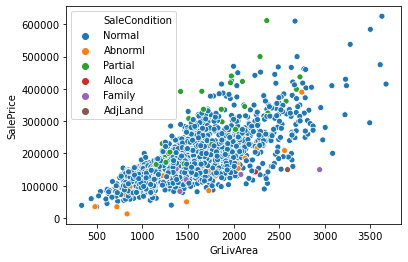

In [12]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='SaleCondition')
#Most of my dataset contains normal sale so I will look at normal sales only

In [13]:
train_housing['SaleCondition'].value_counts()

Normal     1939
Partial      59
Abnorml      47
Family       14
Alloca        3
AdjLand       2
Name: SaleCondition, dtype: int64

In [14]:
#I will analyze the normal sales only and drop all rows containing other types of sale
train_housing =train_housing[train_housing['SaleCondition']=='Normal']
train_housing.shape

(1939, 81)

In [15]:
train_housing['MSZoning'].value_counts()

RL         1525
RM          311
FV           75
RH           15
C (all)      10
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [16]:
#I will remove FV, C,I and A
train_housing=train_housing.loc[~train_housing.MSZoning.isin(['C (all)','I (all)','A (agr)','FV'])]

In [17]:
train_housing['MSZoning'].value_counts()

RL    1525
RM     311
RH      15
Name: MSZoning, dtype: int64

# Kept Normal Sales(SaleCondition) and Residential Type (MSZoning)

In [18]:
nan_values = train_housing.isna()
nan_columns = nan_values.any()
null_list = train_housing.columns[nan_columns].tolist()

In [19]:
null_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

The features with null values are related to Alley, Masonry veneer type, Basement, Fireplace,Garage, Pool, fence and MiscFeatures

In [20]:
#I will look at the unique values of each of these features

In [21]:
#Lotfrontage is Linear feet of street connected to property
train_housing['LotFrontage'].value_counts()

60.0     179
70.0      97
80.0      91
50.0      87
75.0      64
        ... 
138.0      1
141.0      1
140.0      1
126.0      1
104.0      1
Name: LotFrontage, Length: 117, dtype: int64

In [22]:
lotfrontage_null = train_housing[train_housing['LotFrontage'].isna()]
lotfrontage_null

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
746,906223140,2200,225000,60,RL,NaN,14171,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
684,534252090,999,178400,85,RL,NaN,12122,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
541,532353050,912,144000,20,RL,NaN,12968,Pave,NaN,IR2,...,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal
387,909279080,1991,220000,50,RL,NaN,11275,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
875,527325160,2263,235000,60,RL,NaN,16659,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,534250335,1670,170000,60,RL,NaN,13355,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
85,909452102,1680,170000,20,RL,NaN,17871,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1000,914452120,912,156000,85,RL,NaN,7540,Pave,NaN,IR1,...,192,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
878,531384070,1820,191750,60,RL,NaN,11613,Pave,NaN,IR2,...,0,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal


In [23]:
#It is not clear which houses have no lot frontage, I will convert the NA to 0 and see if it has any effect on sale price 
#for similar size homes
train_lot = train_housing
train_lot['LotFrontage'] =train_lot['LotFrontage'].fillna(0)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

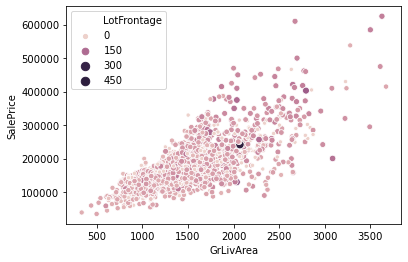

In [24]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='LotFrontage',size='LotFrontage')
#Looks like lot frontage does not have a very high effect on sales price, so I can drop the feature

In [25]:
train_housing = train_housing.drop(['LotFrontage'], axis=1)

# Dropped LotFrontage : No effect on sale price and many houses have nulls

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

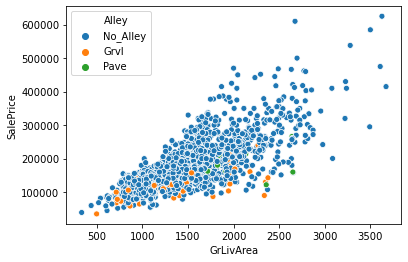

In [26]:
#Alley
#Does alley adds to the price
#I will first convert nas to no_alley
train_housing["Alley"]=train_housing["Alley"].fillna("No_Alley")
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='Alley')
#Having a pavement alley definitely adds value to the house

In general houses with pave alley are higher priced than no Gravel alley and there are 130 houses in my dataset that supports this with very few outliers, The alley with null value means does not have alley, I will convert the null alley to another categorical variable, no_alley

# Paved alley are generally higher priced than gravel alley, changed nulls to no_alley

In [27]:
#'MasVnrType' and 'MasVnrArea'
train_housing['MasVnrType'].value_counts()

None       1136
BrkFace     576
Stone       118
BrkCmn       15
Name: MasVnrType, dtype: int64

In [28]:
train_housing['MasVnrArea'].value_counts()

0.0      1131
120.0       9
132.0       8
108.0       8
176.0       8
         ... 
406.0       1
402.0       1
400.0       1
634.0       1
415.0       1
Name: MasVnrArea, Length: 347, dtype: int64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

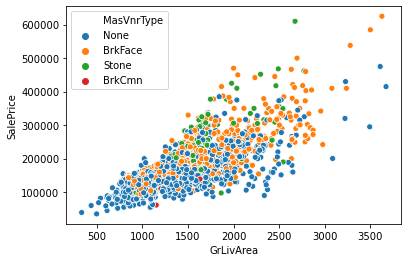

In [29]:
#Most data does not have a value, I will look if one material is more expensive than other
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='MasVnrType')
#The graph below is'nt telling much about it and due to partial information I will drop those two features as well

In [30]:
train_housing = train_housing.drop(['MasVnrType',], axis=1)

# Dropped MasVnrType, it wasnt effecting the sales price much

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

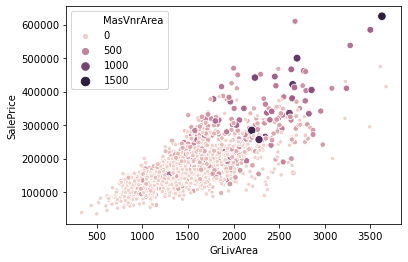

In [31]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='MasVnrArea',size='MasVnrArea')
#Larger houses have larger veneer area

In [32]:
#I will check if mason veneer area is correlated to overall living area
train_housing['MasVnrArea'].corr(train_housing['GrLivArea'])
#It is loosely correlated and due to lot of missing values, I will drop this feature too

0.38338435113741665

In [33]:
train_housing = train_housing.drop(['MasVnrArea',], axis=1)

# Dropped MasVnrArea, it was loosely correlated with GrLivArea

Missing value in basement may imply no basement, so i can convert all nas in basement feature as 0 or not present

In [34]:
Base_features =['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
                'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']

In [35]:
#Checking the values in each of basement feature
for i in Base_features:
    print(i)
    y = train_housing[i].value_counts()
    print(y)   

BsmtQual
TA    908
Gd    725
Ex    114
Fa     55
Name: BsmtQual, dtype: int64
BsmtCond
TA    1659
Gd      72
Fa      65
Po       3
Ex       3
Name: BsmtCond, dtype: int64
BsmtExposure
No    1215
Av     251
Gd     178
Mn     157
Name: BsmtExposure, dtype: int64
BsmtFinType1
GLQ    500
Unf    481
ALQ    302
Rec    214
BLQ    196
LwQ    109
Name: BsmtFinType1, dtype: int64
BsmtFinSF1
0.0       530
24.0       12
16.0        7
288.0       7
20.0        7
         ... 
987.0       1
586.0       1
1096.0      1
867.0       1
415.0       1
Name: BsmtFinSF1, Length: 773, dtype: int64
BsmtFinType2
Unf    1548
Rec      71
LwQ      64
BLQ      52
ALQ      39
GLQ      27
Name: BsmtFinType2, dtype: int64
BsmtFinSF2
0.0      1598
294.0       4
147.0       3
483.0       3
144.0       3
         ... 
875.0       1
873.0       1
448.0       1
497.0       1
38.0        1
Name: BsmtFinSF2, Length: 215, dtype: int64
BsmtUnfSF
0.0       158
384.0      17
816.0       8
300.0       8
572.0       8
         ..

In [36]:
#Checking for null values, among the categorical features NAs imply no basements
for i in Base_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)
#I will look at the row that has NA for the continuous variable (instead of zero)

BsmtQual
49
BsmtCond
49
BsmtExposure
50
BsmtFinType1
49
BsmtFinSF1
0
BsmtFinType2
50
BsmtFinSF2
0
BsmtUnfSF
0
TotalBsmtSF
0
BsmtFullBath
0
BsmtHalfBath
0


In [37]:
#There is 1 row with NA in last few features
print(train_housing.loc[pd.isna(train_housing["BsmtQual"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtCond"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtExposure"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtFinType1"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtFinType2"]), :].index)

Int64Index([165, 450, 192, 128, 744, 388, 237,   8, 368,  38, 648,   6, 756,
            398,  90, 608, 165, 742, 609,  20, 496, 553, 337, 591, 684, 309,
            800, 775, 918, 679, 393, 194, 301, 479, 329, 555, 271, 279, 545,
             65, 576, 905, 620, 160, 555, 284, 487, 295,  89],
           dtype='int64')
Int64Index([165, 450, 192, 128, 744, 388, 237,   8, 368,  38, 648,   6, 756,
            398,  90, 608, 165, 742, 609,  20, 496, 553, 337, 591, 684, 309,
            800, 775, 918, 679, 393, 194, 301, 479, 329, 555, 271, 279, 545,
             65, 576, 905, 620, 160, 555, 284, 487, 295,  89],
           dtype='int64')
Int64Index([165, 450, 192, 128, 744, 388, 237,   8, 368,  38, 648,   6, 756,
            398,  90, 608, 165, 742, 609,  20, 496, 553, 337, 591, 684, 309,
            800, 775, 918, 679, 393, 194, 301, 479, 329, 555, 271, 279, 545,
             65, 576, 905, 620, 160, 555, 284, 202, 487, 295,  89],
           dtype='int64')
Int64Index([165, 450, 192, 128, 744

In [38]:
#I will change the nan for comntinuous variables to 0 and categoric variable to no_basement
train_housing["BsmtQual"]=train_housing["BsmtQual"].fillna("No_basement")
train_housing["BsmtCond"]=train_housing["BsmtCond"].fillna("No_basement")
train_housing["BsmtExposure"]=train_housing["BsmtExposure"].fillna("No_basement")
train_housing["BsmtFinType1"]=train_housing["BsmtFinType1"].fillna(0)
train_housing["BsmtFinType2"]=train_housing["BsmtFinType2"].fillna(0)

# Change null for categorical features (Basement) to no_basement and continuous variables to 0

In [39]:
for i in Base_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)
#All the basement related null values are taken care of

BsmtQual
0
BsmtCond
0
BsmtExposure
0
BsmtFinType1
0
BsmtFinSF1
0
BsmtFinType2
0
BsmtFinSF2
0
BsmtUnfSF
0
TotalBsmtSF
0
BsmtFullBath
0
BsmtHalfBath
0


In [40]:
#FireplaceQu
train_housing['FireplaceQu'].isna().sum() 

882

In [41]:
#There are 931 houses with no fireplace, I will replace them with 'no_fireplace' too
train_housing["FireplaceQu"]=train_housing["FireplaceQu"].fillna("No_Fireplace")

# 882 houses did not have fireplace, changed null values to no_fireplace

In [42]:
#'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'
garage_features = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [43]:
for i in garage_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)

GarageType
90
GarageYrBlt
90
GarageFinish
90
GarageQual
90
GarageCond
90


In [44]:
#92 houses do not have garage
#Checking the values in each of garage features
for i in garage_features:
    print(i)
    y = train_housing[i].value_counts()
    print(y)  

GarageType
Attchd     1101
Detchd      509
BuiltIn     111
2Types       16
Basment      16
CarPort       8
Name: GarageType, dtype: int64
GarageYrBlt
2005.0    66
2004.0    63
2003.0    60
1977.0    46
1998.0    39
          ..
1908.0     1
1931.0     1
1914.0     1
1943.0     1
1918.0     1
Name: GarageYrBlt, Length: 98, dtype: int64
GarageFinish
Unf    830
RFn    509
Fin    422
Name: GarageFinish, dtype: int64
GarageQual
TA    1657
Fa      83
Gd      17
Ex       3
Po       1
Name: GarageQual, dtype: int64
GarageCond
TA    1689
Fa      52
Gd      11
Po       6
Ex       3
Name: GarageCond, dtype: int64


In [45]:
#First and Last 4 are categoric variable, we can drop garage year built feature since in most cases age of house will
#determine the saleprice than age of garage
train_housing = train_housing.drop(['GarageYrBlt',], axis=1)

# Dropped garage year built since in most houses house year = garage year

In [46]:
#Replacing null of all other categorical variable by no_garage
garage_new_features = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage_new_features:
    train_housing[i]=train_housing[i].fillna("No_garage")

In [47]:
for i in garage_new_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)

GarageType
0
GarageFinish
0
GarageQual
0
GarageCond
0


# Replace nulls in garage features (categorical) to no_garage

In [48]:
#Pool, Fence and MiscFeatures

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

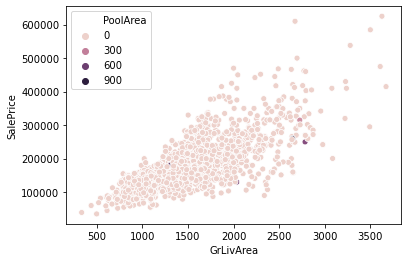

In [49]:
#Pool
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='PoolArea')

In [50]:
#Very few houses have pools, so we decided to drop those rows and drop the pool related column
train_housing =train_housing[train_housing['PoolArea']==0]
train_housing = train_housing.drop(['PoolArea', 'PoolQC'], axis=1)
train_housing.shape

(1844, 75)

# Dropped all houses with pool (only 9 houses)

In general houses with pave alley are higher priced than no Gravel alley and there are 130 houses in my dataset that supports this with very few outliers, The alley with null value means does not have alley, I will convert the null alley to another categorical variable, no_alley

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

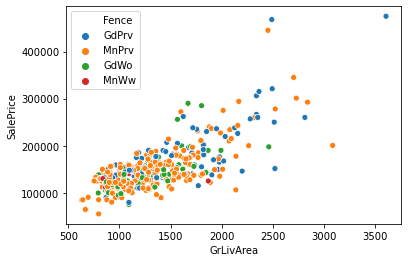

In [51]:
#Fence
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='Fence')

In [52]:
#There are 426 houses with fence, most of the houses above 2000 sqft have good-min privacy and houses with good privacy 
#are in general costlier. I will compare fence vrs no fence
train_housing["Fence"]=train_housing["Fence"].fillna("No_Fence")


# Changed null values in fence to no_fence, good to min privacy are in general costlier so I decided to keep this feature

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

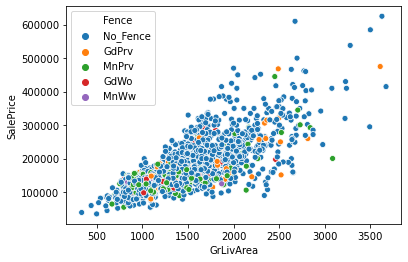

In [53]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='Fence')

Houses with fence are concentrared in between with higher price for good privacy fences among all other fences

In [54]:
#Misc Features
train_housing['MiscFeature'].value_counts()

Shed    63
Gar2     3
Othr     3
Name: MiscFeature, dtype: int64

In [55]:
#Changing the null values into no_misc
train_housing["MiscFeature"]=train_housing["MiscFeature"].fillna("No_MiscFeature")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

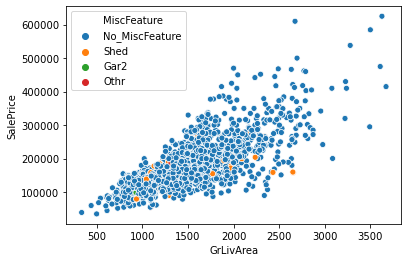

In [56]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='MiscFeature')

In [57]:
#A Shed and second garage is definitely adding value to the house but we have very few data(3) with second garage,
#so I will drop the second garage feature and row. The effect of other feature is not known and since there are just 3 
#datapoints, I will drop the houses with second garage and othr features
train_housing =train_housing[train_housing['MiscFeature']!='Gar2']
train_housing =train_housing[train_housing['MiscFeature']!='Othr']


# Among miscfeatures shed added value to houses, there were 3 houses with 2nd garage and othr misc feature, so I dropped these three rows

In [58]:
train_housing.to_csv('train_housing_dropnull.csv')

# Function for Initial Data Cleaning

In [2]:
def drop_null(train_housing):
    #Null Values
    #1.Alley
    train_housing["Alley"]=train_housing["Alley"].fillna("No_Alley")
    #2.Basement Features
    train_housing["BsmtQual"]=train_housing["BsmtQual"].fillna("No_basement")
    train_housing["BsmtCond"]=train_housing["BsmtCond"].fillna("No_basement")
    train_housing["BsmtExposure"]=train_housing["BsmtExposure"].fillna("No_basement")
    train_housing["BsmtFinType1"]=train_housing["BsmtFinType1"].fillna(0)
    train_housing["BsmtFinType2"]=train_housing["BsmtFinType2"].fillna(0)
    #3. Fireplace
    train_housing["FireplaceQu"]=train_housing["FireplaceQu"].fillna("No_Fireplace")
    #4. Garage Features
    garage_new_features = ['GarageType','GarageFinish','GarageQual','GarageCond']
    for i in garage_new_features:
        train_housing[i]=train_housing[i].fillna("No_garage")
    #Fence
    train_housing["Fence"]=train_housing["Fence"].fillna("No_Fence")
    #Misc features
    train_housing["MiscFeature"]=train_housing["MiscFeature"].fillna("No_MiscFeature")
    return train_housing

In [3]:
def drop_row_feature(train_housing):    
    #dropped codes
    #1. Normal sales only
    train_housing =train_housing[train_housing['SaleCondition']=='Normal']
    #2. I will remove FV, C,I and A
    train_housing=train_housing.loc[~train_housing.MSZoning.isin(['C (all)','I (all)','A (agr)','FV'])]
    #3. dropped lotfrontage
    train_housing = train_housing.drop(['LotFrontage'], axis=1)
    #4. Dropped MasnVnr
    train_housing = train_housing.drop(['MasVnrType',], axis=1)
    #5. Dropped Msnvnrarea
    train_housing = train_housing.drop(['MasVnrArea',], axis=1)
    #6. Dropped Garage Year Built
    train_housing = train_housing.drop(['GarageYrBlt',], axis=1)
    #7. Everything related to pool, rows and features
    train_housing =train_housing[train_housing['PoolArea']==0]
    train_housing = train_housing.drop(['PoolArea', 'PoolQC'], axis=1)
    #8. Garage2 and othr
    train_housing =train_housing[train_housing['MiscFeature']!='Gar2']
    train_housing =train_housing[train_housing['MiscFeature']!='Othr']
    #9.quality and condition related
    train_housing = train_housing.drop(['ExterCond','ExterQual','KitchenQual'], axis=1)
    #10. 'BsmtCond','GarageQual','FireplaceQu','BsmtExposure'
    train_housing=train_housing.drop(['BsmtCond','GarageQual','FireplaceQu','BsmtExposure'],axis =1)
    return train_housing

In [59]:
#Will do the same cleaning on test dataset
test_housing = drop_null(test_housing)
test_housing = drop_row_feature(test_housing)

In [61]:
test_housing.to_csv('test_housing_dropnull.csv')

In [63]:
#For house year built converted to age
housing_price=drop_null(housing_price)
housing_price=drop_row_feature(housing_price)

In [65]:
housing_price.to_csv('housing_age_dropnull.csv')